<a href="https://colab.research.google.com/github/phucdzu/AI/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bada83601e01321a61e669d0db5a02a95b08d068b5b872d1941e14689b87118d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [23]:
setpoint = ctrl.Antecedent(np.arange(12,33,1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(-3,61,1), 'sensor')
PWM = ctrl.Consequent(np.arange(0,256,1), 'PWM')

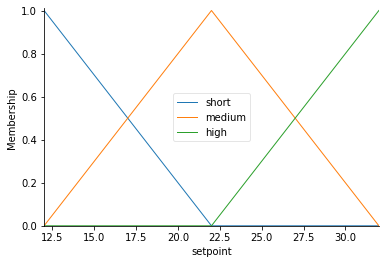

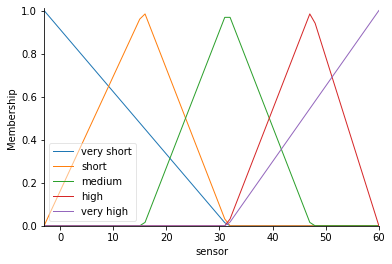

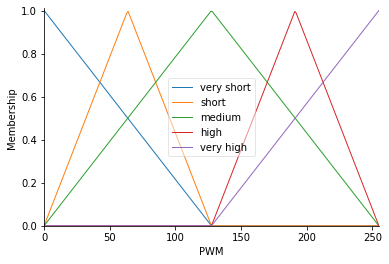

In [24]:
setpoint['short'] = fuzz.trimf(setpoint.universe, [12,12,22])
setpoint['medium'] = fuzz.trimf(setpoint.universe, [12,22,32])
setpoint['high'] = fuzz.trimf(setpoint.universe, [22,32,32])
setpoint.view()

sensor['very short'] = fuzz.trimf(sensor.universe, [-3,-3,31.5])
sensor['short'] = fuzz.trimf(sensor.universe, [-3,15.75,31.5])
sensor['medium'] = fuzz.trimf(sensor.universe, [15.75,31.5,47.25])
sensor['high'] = fuzz.trimf(sensor.universe, [31.5,47.25,60])
sensor['very high'] = fuzz.trimf(sensor.universe, [31.5,60,60])
sensor.view()

PWM['very short'] = fuzz.trimf(PWM.universe, [0,0,127.5])
PWM['short'] = fuzz.trimf(PWM.universe, [0,63.75,127.5])
PWM['medium'] = fuzz.trimf(PWM.universe, [0,127.5,255])
PWM['high'] = fuzz.trimf(PWM.universe, [127.5,191.25,255])
PWM['very high'] = fuzz.trimf(PWM.universe, [127.5,255,255])
PWM.view()

In [25]:
rule1 = ctrl.Rule(sensor['very short'] & setpoint['short'],PWM['very short'])
rule2 = ctrl.Rule(sensor['short']      & setpoint['short'],PWM['short'])
rule3 = ctrl.Rule(sensor['medium']   & setpoint['short'],PWM['medium'])
rule4 = ctrl.Rule(sensor['high']     & setpoint['short'],PWM['high'])
rule5 = ctrl.Rule(sensor['very high']& setpoint['short'],PWM['very high'])

rule6 = ctrl.Rule(sensor['very short'] & setpoint['medium'],PWM['short'])
rule7 = ctrl.Rule(sensor['short']      & setpoint['medium'],PWM['very short'])
rule8 = ctrl.Rule(sensor['medium']   & setpoint['medium'],PWM['very short'])
rule9 = ctrl.Rule(sensor['high']     & setpoint['medium'],PWM['short'])
rule10 = ctrl.Rule(sensor['very high']& setpoint['medium'],PWM['medium'])

rule11 = ctrl.Rule(sensor['very short'] & setpoint['high'],PWM['high'])
rule12 = ctrl.Rule(sensor['short']      & setpoint['high'],PWM['high'])
rule13 = ctrl.Rule(sensor['medium']   & setpoint['high'],PWM['medium'])
rule14 = ctrl.Rule(sensor['high']     & setpoint['high'],PWM['very short'])
rule15 = ctrl.Rule(sensor['very high']& setpoint['high'],PWM['short'])

83.49999999999976


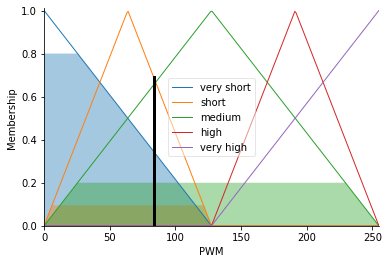

In [26]:
PWMping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMping= ctrl.ControlSystemSimulation(PWMping_ctrl)
PWMping.input['sensor']=30
PWMping.input['setpoint']=20
PWMping.compute()
print(PWMping.output['PWM'])
PWM.view(sim=PWMping)

In [27]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [30]:
sensorLeft = ctrl.Antecedent(np.arange(0, 100, 1), 'sensorLeft')
sensorCenter = ctrl.Antecedent(np.arange(0, 100, 1), 'sensorCenter')
sensorRight = ctrl.Antecedent(np.arange(0, 100, 1), 'sensorRight')
PWM_DC1 = ctrl.Consequent(np.arange(0, 255 , 1), 'PWM_DC1')
PWM_DC2= ctrl.Consequent(np.arange(0, 255 , 1), 'PWM_DC2')

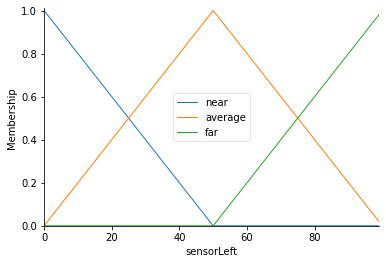

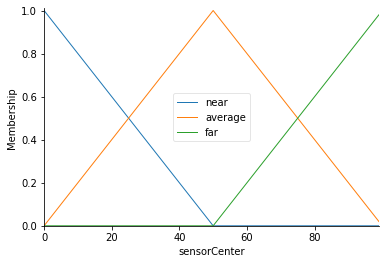

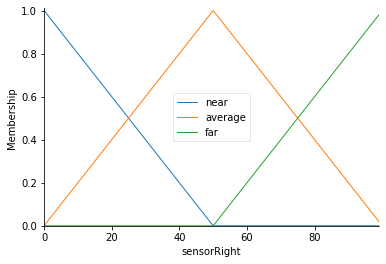

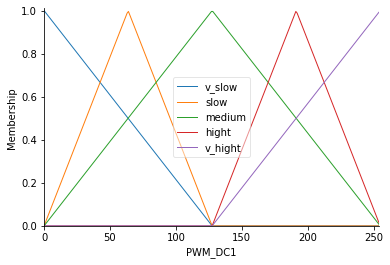

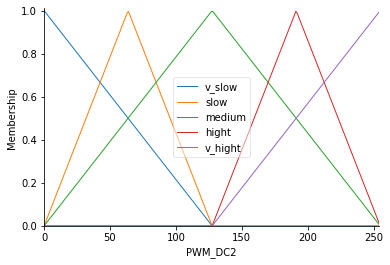

In [31]:
sensorLeft['near'] = fuzz.trimf(sensorLeft.universe, [0, 0, 50])
sensorLeft['average'] = fuzz.trimf(sensorLeft.universe, [0, 50, 100])
sensorLeft['far'] = fuzz.trimf(sensorLeft.universe, [50, 100, 100])
sensorLeft.view()

sensorCenter['near'] = fuzz.trimf(sensorCenter.universe, [0, 0, 50])
sensorCenter['average'] = fuzz.trimf(sensorCenter.universe, [0, 50, 100])
sensorCenter['far'] = fuzz.trimf(sensorCenter.universe, [50, 100, 100])
sensorCenter.view()

sensorRight['near'] = fuzz.trimf(sensorRight.universe, [0, 0, 50])
sensorRight['average'] = fuzz.trimf(sensorRight.universe, [0, 50, 100])
sensorRight['far'] = fuzz.trimf(sensorRight.universe, [50, 100, 100])
sensorRight.view()

PWM_DC1['v_slow'] = fuzz.trimf(PWM_DC1.universe, [0, 0, 127.5])
PWM_DC1['slow'] = fuzz.trimf(PWM_DC1.universe, [0, 63.75, 127.5])
PWM_DC1['medium'] = fuzz.trimf(PWM_DC1.universe, [0, 127.5,255])
PWM_DC1['hight'] = fuzz.trimf(PWM_DC1.universe, [127.5, 191.25, 255])
PWM_DC1['v_hight'] = fuzz.trimf(PWM_DC1.universe, [127.5, 255, 255])
PWM_DC1.view()

PWM_DC2['v_slow'] = fuzz.trimf(PWM_DC2.universe, [0, 0, 127.5])
PWM_DC2['slow'] = fuzz.trimf(PWM_DC2.universe, [0, 63.75, 127.5])
PWM_DC2['medium'] = fuzz.trimf(PWM_DC2.universe, [0, 127.5,255])
PWM_DC2['hight'] = fuzz.trimf(PWM_DC2.universe, [127.5, 191.25, 255])
PWM_DC2['v_hight'] = fuzz.trimf(PWM_DC2.universe, [127.5, 255, 255])
PWM_DC2.view()